# Part 2: Machine Learning
### Multiple Linear regression model to pedict the price of cars based on other features in the dataset.


In [23]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# load dataset - this is the cleaned version of the dataset
ml = pd.read_csv("clean_data.csv")
ml.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_group,car_id,odometer_group
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,False,True,False,True,True,True,16,Expensive Cars,0,Low
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,True,False,False,False,True,83,Medium Price,1,Low
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,True,True,151,Low Price,2,Medium
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,86,Expensive Cars,3,Low
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,True,7,Low Price,4,Low


In [4]:
ml.shape

(38490, 33)

In [5]:
ml.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,car_id
count,38490.000000,38490.000000,38490.000000,38490.000000,38490.000000,38490.000000,38490.000000,38490.000000
mean,249062.053261,2002.932398,2.055491,6632.630145,9.645103,16.320629,80.652143,19255.701897
std,135918.108983,8.050272,0.671279,6423.447258,6.093890,43.307541,112.861997,11122.028985
min,0.000000,1950.000000,0.200000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000,9624.250000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000,19252.500000
75%,325000.000000,2009.000000,2.300000,8950.000000,12.000000,16.000000,91.000000,28875.750000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000,38530.000000


In [6]:
# print the name of columns present in dataset
columns = ml.columns
columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed', 'price_group', 'car_id',
       'odometer_group'],
      dtype='object')

In [7]:
# get the index location of the target variable
columns.get_loc('price_usd')

14

#### Plotting the heatmap

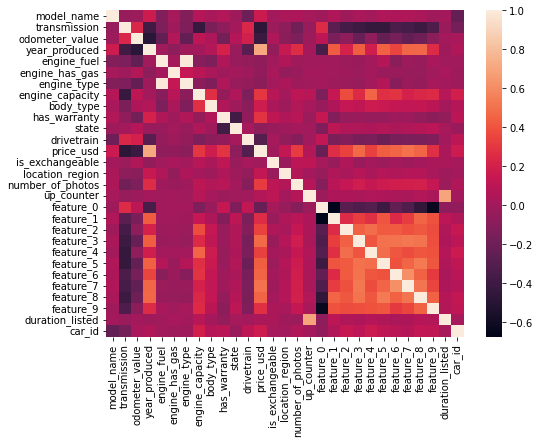

In [22]:
plt.figure(figsize = [8, 6])
sns.heatmap(ml.corr());

#### Transforming categorical columns to numerical variables

In [9]:
# converting categorical columns to numerical variables for training

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['model_name', 'transmission', 'engine_fuel', 'engine_has_gas', 'engine_type', 'body_type', 
                    'has_warranty', 'state', 'drivetrain', 'is_exchangeable', 'location_region', 'feature_0', 
                    'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 
                    'feature_8', 'feature_9']

#load the LabelEncoder
labelencoder = LabelEncoder()
ml[categorical_cols] = ml[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))

#Load OneHotEncoder
onehotencoder = OneHotEncoder()
array_hot_encoded = onehotencoder.fit_transform(ml[categorical_cols])
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=ml.index)

data_other_cols = ml.drop(columns = categorical_cols)
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [10]:
ml.sample(4)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_group,car_id,odometer_group
2653,Opel,258,1,red,256000,1992,3,0,2,1.6,...,0,0,0,0,0,0,33,Low Price,2653,Low
8768,Fiat,772,1,red,260000,1998,3,0,2,1.6,...,0,0,0,0,0,0,2,Low Price,8770,Low
25523,Hyundai,935,1,green,234569,1999,3,0,2,2.0,...,0,0,0,0,0,0,41,Low Price,25532,Low
11200,Ford,516,1,white,476346,2001,0,0,0,1.8,...,0,0,0,1,1,0,30,Low Price,11203,Medium


#### Feature selection and splitting the data into train and test set

In [11]:
# features to be used as X for training and prediction
cols = ['transmission', 'odometer_value', 'year_produced', 'engine_fuel', 
        'engine_has_gas', 'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9']

In [12]:
# selecting the x(input) and y(output) variables

X = ml[cols]
y = ml.iloc[:, 14]

In [13]:
# splitting the dataset into the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Training the model

In [17]:
# fitting (training) the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

#### Testing the model

In [16]:
# predicting the test set
y_pred = lin_reg.predict(X_test)

#### Model Evaluation

##### 1. Using Root Mean Squared Error

In [18]:
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSE

3664.9866397017963

In [19]:
Normalised_RMSE = RMSE/(50000 - 1)
print("The Root Mean Squared Error is: ", (Normalised_RMSE))

The Root Mean Squared Error is:  0.07330119881801228


##### 2. Using R2 Error

In [20]:
r2_error = r2_score(y_test, y_pred)
print("The R-squared error is: ", (r2_error)*100)

The R-squared error is:  68.00168505051786


### Conclusion:

* The model recorded an accuracy of 68% when tested on the test set using R-squared metric.
* The RMSE value is 0.073

#### Comparing the actual value to the predicted value

In [41]:
pred_value = pd.DataFrame(X_test)
pred_value['actual_price'] = y_test
pred_value['predicted_price'] = y_pred
new_df = pred_value[['actual_price','predicted_price']]
new_df.sample(30)

,actual_price,predicted_price
35020,3500.00,4228.257942
3746,3700.00,5579.261034
5274,7500.00,10360.134382
32829,2500.00,2464.368865
2146,2500.00,5590.874917
4981,24000.00,17093.513093
26151,11200.00,13026.068092
3714,5400.00,3830.678914
30681,19900.00,15355.141763
5959,7800.00,9383.319163
